Numpy --> Arrays & Math

In [ ]:
import numpy as np
arr = np.array([1, 2, 3, 4])
print("Mean:", arr.mean())

Mean: 2.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Numpy Matrix Operations

In [ ]:
import numpy as np

# Convert data to NumPy arrays
humidity = np.array([60, 80, 90, 70, 25, 65, 30, 40])
temp = np.array([18, 25, 27, 19, 32, 14, 21, 26])

# Example 1: Elementwise operations
print("Humidity + Temp =", humidity + temp)

# Example 2: Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("Matrix Multiplication:\n", A @ B)   # instead of loops

# Example 3: Reshape & vectorized computation
X = np.column_stack((humidity, temp))   # shape (8,2)
print("Dataset shape:", X.shape)
print("Mean of each column:", X.mean(axis=0))

Humidity + Temp = [ 78 105 117  89  57  79  51  66]
Matrix Multiplication:
 [[19 22]
 [43 50]]
Dataset shape: (8, 2)
Mean of each column: [57.5  22.75]


Pandas –-> Data Handling

In [ ]:
import pandas as pd
data = {"Humidity": [60, 80, 90, 70, 25, 65, 30, 40], "Temp": [18, 25, 27, 19, 32, 14, 21, 26]}
df = pd.DataFrame(data)
print(df.head())

   Humidity  Temp
0        60    18
1        80    25
2        90    27
3        70    19
4        25    32


Matplotlib --> Visualization

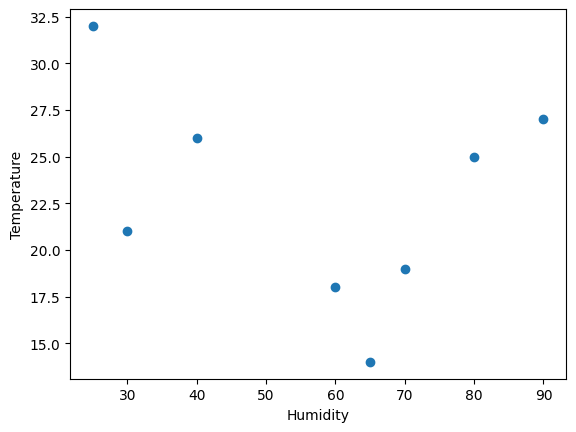

In [ ]:
import matplotlib.pyplot as plt

#1 Scatter Plot

plt.scatter(df["Humidity"], df["Temp"])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()


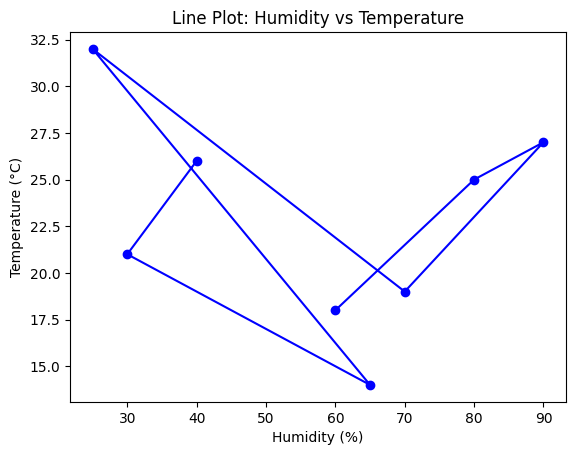

In [ ]:
#2 Line Plot

plt.plot(df["Humidity"], df["Temp"], marker='o', color="blue")
plt.title("Line Plot: Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

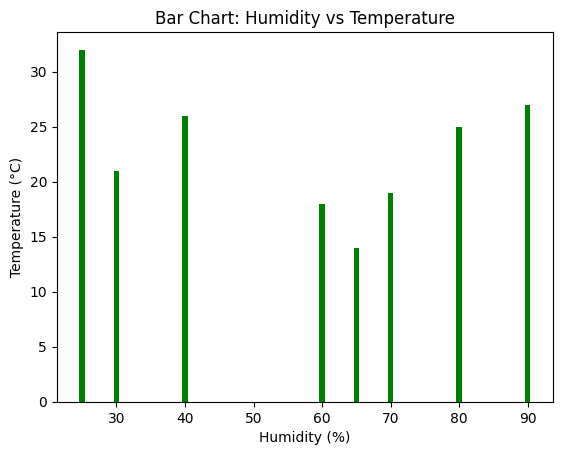

In [ ]:
#3 Bar Chart

plt.bar(df["Humidity"], df["Temp"], color="green")
plt.title("Bar Chart: Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

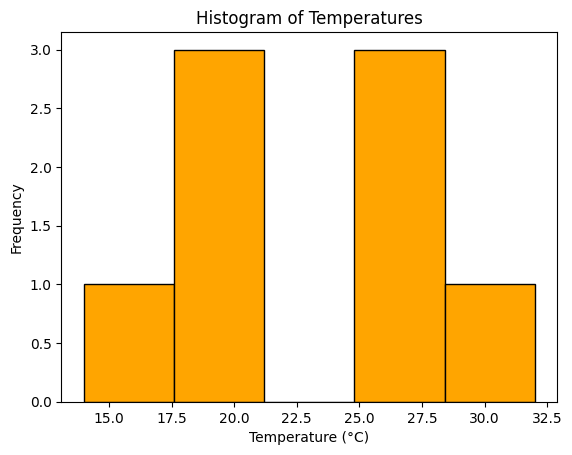

In [ ]:
# 4. Histogram (Temperatures only)

plt.hist(df["Temp"], bins=5, color="orange", edgecolor="black")
plt.title("Histogram of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

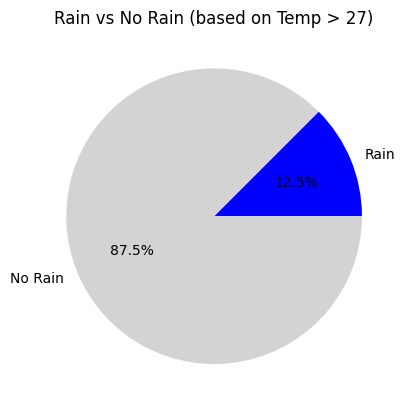

In [ ]:
# 5. Pie Chart (Rain vs No Rain – just an example)
# Assume: Temp > 27 → Rain, else → No Rain
rain = (df["Temp"] > 27).sum()
no_rain = len(df) - rain

plt.pie([rain, no_rain],
        labels=["Rain", "No Rain"],
        autopct="%1.1f%%",
        colors=["blue", "lightgrey"])
plt.title("Rain vs No Rain (based on Temp > 27)")
plt.show()

Some Operations with Respect to the Sample Dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Sample Dataset.csv")
print(df.head())

# Inspect dataset
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.describe())   # summary stats

# Select specific columns
print("Humidity values:\n", df["Humidity  (%)"].head())

# Filtering
print("Days with high humidity:\n", df[df["Humidity  (%)"] > 70])

# Group by Rain
print("Average Temp grouped by Rain:\n", df.groupby("Rain")["Temperature (degree Celsius)"].mean())


   Day No.  Humidity  (%)  Temperature (degree Celsius) Rain
0        1             80                            20  Yes
1        2             20                            15   No
2        3             70                            25  Yes
3        4             30                            24  Yes
4        5             55                            28   No
Shape: (10, 4)
Columns: Index(['Day No.', 'Humidity  (%)', 'Temperature (degree Celsius)', 'Rain'], dtype='object')
        Day No.  Humidity  (%)  Temperature (degree Celsius)
count  10.00000      10.000000                     10.000000
mean    5.50000      54.100000                     20.700000
std     3.02765      19.456219                      4.164666
min     1.00000      20.000000                     15.000000
25%     3.25000      44.250000                     17.500000
50%     5.50000      55.500000                     20.500000
75%     7.75000      69.500000                     23.500000
max    10.00000      80.000000

In [ ]:
import numpy as np

humidity = df["Humidity  (%)"].values
temp = df["Temperature (degree Celsius)"].values

# Convert to 2D array
X = np.column_stack((humidity, temp))

print("Shape of X:", X.shape)
print("Column means (Humidity, Temp):", X.mean(axis=0))

# Elementwise ops
print("Humidity + Temp:", humidity + temp)

# Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("Matrix Multiplication:\n", A @ B)

# Broadcasting
scaled_temp = temp * 1.8 + 32   # Convert °C → °F
print("Temperatures in Fahrenheit:", scaled_temp)


Shape of X: (10, 2)
Column means (Humidity, Temp): [54.1 20.7]
Humidity + Temp: [100  35  95  54  83  87  66  90  60  78]
Matrix Multiplication:
 [[19 22]
 [43 50]]
Temperatures in Fahrenheit: [68.  59.  77.  75.2 82.4 66.2 69.8 62.6 60.8 71.6]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features and labels
X = df[["Humidity  (%)", "Temperature (degree Celsius)"]]
y = (df["Rain"] == "Yes").astype(int)  # Convert Yes/No to 1/0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [1 1 1]
Accuracy: 0.3333333333333333


Pytorch Opertions

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert dataset to PyTorch tensors
X = torch.tensor(df[["Humidity  (%)", "Temperature (degree Celsius)"]].values, dtype=torch.float32)
y = torch.tensor((df["Rain"] == "Yes").astype(int).values, dtype=torch.float32).unsqueeze(1)

# ---- Tensor Operations Demo ----
print("Tensor Shape:", X.shape)
print("Mean per column:", X.mean(dim=0))
print("Matrix multiplication:\n", X.T @ X)  # covariance-like matrix
print("Elementwise addition:\n", X[:,0] + X[:,1])

# ---- Define simple logistic regression model ----
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop
for epoch in range(300):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Final Loss:", loss.item())
print("Predictions:", (model(X).detach().numpy() > 0.5).astype(int).ravel())


Tensor Shape: torch.Size([10, 2])
Mean per column: tensor([54.1000, 20.7000])
Matrix multiplication:
 tensor([[32675., 11324.],
        [11324.,  4441.]])
Elementwise addition:
 tensor([100.,  35.,  95.,  54.,  83.,  87.,  66.,  90.,  60.,  78.])
Final Loss: 40.85649490356445
Predictions: [1 1 1 1 1 1 1 1 1 1]
